In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('Xalapa.txt', skiprows = 4, sep = '\s+')

In [4]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
0,31/01/2019,15:30,90,196,0.7,1.5,16.0,88,868.2,0.0,273.0
1,31/01/2019,15:40,65,160,0.8,1.4,16.7,81,868.3,0.0,302.0
2,31/01/2019,15:50,66,152,1.1,2.6,16.7,77,868.4,0.0,316.0
3,31/01/2019,16:00,102,244,1.1,2.5,17.1,72,868.4,0.0,279.0
4,31/01/2019,16:10,111,250,1.3,2.7,18.2,67,868.5,0.0,853.0


In [5]:
df = pd.DataFrame(df0)

In [6]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [7]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [8]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,90,196,0.7,1.5,16.0,88,868.2,0.0,273.0,2019-01-31 15:30:00
1,65,160,0.8,1.4,16.7,81,868.3,0.0,302.0,2019-01-31 15:40:00
2,66,152,1.1,2.6,16.7,77,868.4,0.0,316.0,2019-01-31 15:50:00
3,102,244,1.1,2.5,17.1,72,868.4,0.0,279.0,2019-01-31 16:00:00
4,111,250,1.3,2.7,18.2,67,868.5,0.0,853.0,2019-01-31 16:10:00


In [9]:
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000
mean,157.253521,246.760563,1.547887,3.464789,17.530986,76.746479,866.542254,0.0,250.507042
std,48.454314,64.049415,0.604237,1.236019,1.980158,16.039877,1.098266,0.0,244.733083
min,52.000000,4.000000,0.600000,1.400000,14.300000,56.000000,865.300000,0.0,-1.000000
25%,128.500000,223.000000,1.000000,2.450000,15.350000,63.500000,865.700000,0.0,4.500000
50%,145.000000,252.000000,1.500000,3.500000,17.400000,70.000000,866.100000,0.0,253.000000
75%,187.000000,291.000000,2.000000,4.400000,19.200000,99.000000,867.450000,0.0,363.000000
max,263.000000,355.000000,2.800000,6.200000,20.800000,100.000000,868.500000,0.0,949.000000


In [10]:
df_tmp = df[df.TEMP > 20] 
df_select = df_tmp[df_tmp.TEMP < 30]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
30,135,294,2.2,4.6,20.1,64,865.9,0.0,369.0,2019-01-31 20:30:00
31,145,327,2.1,4.4,20.1,63,865.8,0.0,474.0,2019-01-31 20:40:00
36,128,245,2.2,4.3,20.1,66,865.6,0.0,188.0,2019-01-31 21:30:00
37,140,290,1.8,4.8,20.4,65,865.5,0.0,535.0,2019-01-31 21:40:00
38,137,228,2.1,4.7,20.8,62,865.4,0.0,577.0,2019-01-31 21:50:00
39,134,204,2.5,6.2,20.8,62,865.4,0.0,459.0,2019-01-31 22:00:00
40,126,180,2.5,4.8,20.1,65,865.4,0.0,541.0,2019-01-31 22:10:00


In [11]:
df.mean()

DIRS          157.253521
DIRR          246.760563
RAPVIENTO2      1.547887
RAPRAFAGA2      3.464789
TEMP           17.530986
HR             76.746479
PB            866.542254
PREC            0.000000
RAD-SOL       250.507042
dtype: float64

In [12]:
df.TEMP.mean()

17.530985915492952

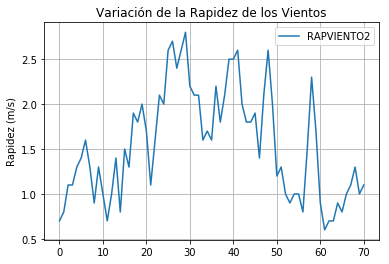

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

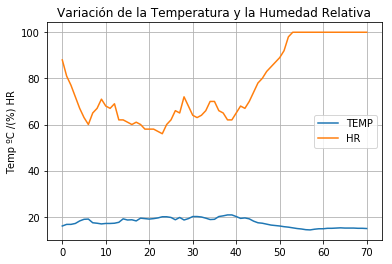

In [23]:

# Gráfica de Temperatura y Humedad Relativa# Gráfic 
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

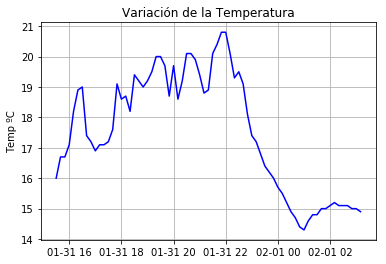

In [15]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

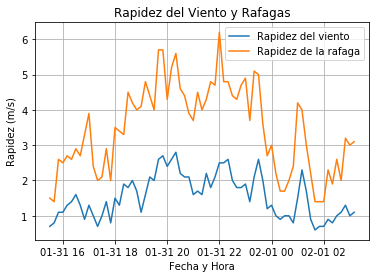

In [16]:
#Gráfica de la rapidez del viento y las ráfagas en función del tiempo
df2 = df[['RAPVIENTO2','RAPRAFAGA2']]
plt.plot(df.FECHA,df2); plt.legend(["Rapidez del viento","Rapidez de la rafaga"])
plt.title("Rapidez del Viento y Rafagas")
plt.xlabel("Fecha y Hora")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

Podemos ver que a las 10 de la noche el viento corre a mayor velocidad

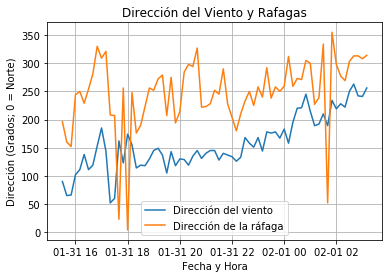

In [25]:
#Gráfica con la direccion de los vientos en funcion del tiempo
df3 = df[['DIRS','DIRR']]
plt.plot(df.FECHA,df3); plt.legend(["Dirección del viento","Dirección de la ráfaga"])
plt.title("Dirección del Viento y Rafagas")
plt.xlabel("Fecha y Hora")
plt.ylabel("Dirección (Grados; 0 = Norte)")
plt.grid(True)
plt.show()

Podemos ver que los vientos en dirección Oeste (alrededor de 270 grados) son los que predominan. Mientras que para las rafagas, la dirección predominante es sur/suroeste.

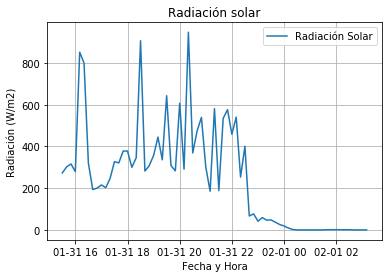

In [18]:
#Gráfica de la radiacion solar en funcion del tiempo
plt.plot(df.FECHA,df['RAD-SOL']); plt.legend(['Radiación Solar'])
plt.title("Radiación solar")
plt.xlabel("Fecha y Hora")
plt.ylabel("Radiación (W/m2)")
plt.grid(True)
plt.show()

Al ser una región tropical, es posible que mucha parte de el día se encuentre 'nublado' ṕor lo que la radiación es un poco menor a comparacion de otras partes de la republica. Además, como es de esperar

In [19]:
#Lapso de la temperatura
df.TEMP.max() - df.TEMP.min()

6.5

La temperatura minima de ésta region entre las 4 de la tarde y las 2 de la madrugada es 14.3 y la maxima es 20.8 (grados centígrados).

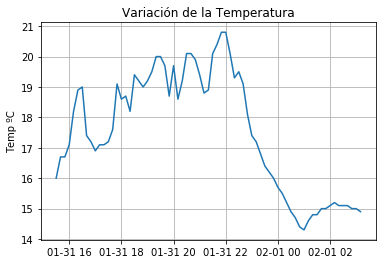

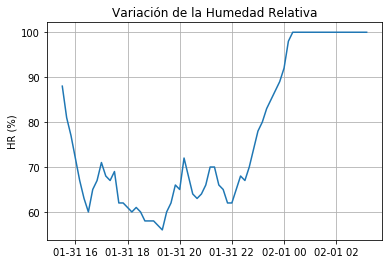

In [33]:

# Gráfica de Temperatura y Humedad Relativa# Gráfic 
plt.plot(df.FECHA,df.TEMP)
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()
plt.plot(df.FECHA,df.HR)
plt.title("Variación de la Humedad Relativa")
plt.ylabel("HR (%)")
plt.grid(True)
plt.show()

Se puede observar que la humedad se eleva cuando la temperatura baja, y viceversa.

In [21]:
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000
mean,157.253521,246.760563,1.547887,3.464789,17.530986,76.746479,866.542254,0.0,250.507042
std,48.454314,64.049415,0.604237,1.236019,1.980158,16.039877,1.098266,0.0,244.733083
min,52.000000,4.000000,0.600000,1.400000,14.300000,56.000000,865.300000,0.0,-1.000000
25%,128.500000,223.000000,1.000000,2.450000,15.350000,63.500000,865.700000,0.0,4.500000
50%,145.000000,252.000000,1.500000,3.500000,17.400000,70.000000,866.100000,0.0,253.000000
75%,187.000000,291.000000,2.000000,4.400000,19.200000,99.000000,867.450000,0.0,363.000000
max,263.000000,355.000000,2.800000,6.200000,20.800000,100.000000,868.500000,0.0,949.000000


La funcion descibe() genera una tabla con un análisis estadistico de los datos.

* **count**: numero de datos de la columna.
* **mean**: media (promedio) de los datos de la columna.
* **std**: desviación estandar.
* **min**: valor minimo de la columna.
* **25%**: primer cuartil.
* **50**: segundo cuartil (mediana).
* **max**: valor maximo de la columna.